<a href="https://colab.research.google.com/github/EnesAgirman/Machine_Learning/blob/main/Codes/Linear%20Regression/Linear_Regression_Stochastic_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

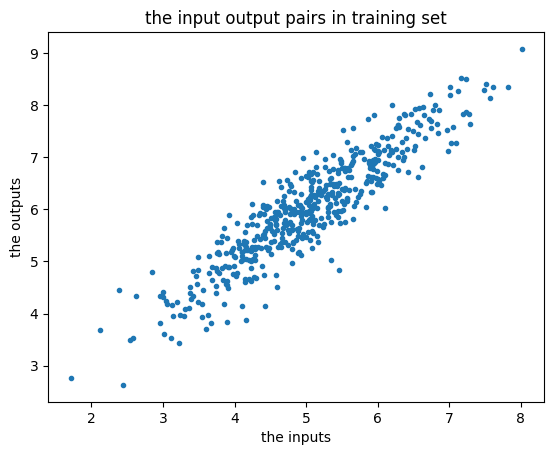

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from IPython.display import clear_output
from numpy.ma.core import squeeze

# The code used in generating the data is taken from https://www.geeksforgeeks.org/ml-mini-batch-gradient-descent-with-python/

# creating data

# Input data size
inputSize = 500

#The mean on the x axis and the mean on the y axis
mean = np.array([5.0, 6.0])

cov = np.array([[1.0, 1], [1, 1.2]])  # The covariance matrix.
# For more info about the covariance matrix, see: https://www.youtube.com/watch?v=WBlnwvjfMtQ&ab_channel=Serrano.Academy

# Our input data
data = np.random.default_rng(seed=42).multivariate_normal(mean, cov, inputSize)
data = np.hstack((np.ones((data.shape[0], 1)), data))

# visualising data

# get the first 50 points from the first and second dimension of the data
plt.scatter(data[:, 1], data[:, 2], marker='.')
plt.title("the input output pairs in training set")
plt.xlabel("the inputs")
plt.ylabel("the outputs")
plt.show()

# The proportion of the data we have that we use for training set. We will use the data not used in training set in the test set
trainProportion = 0.8
trainSplit = int(trainProportion * data.shape[0])

X_train = data[:trainSplit, :2]
Y_train = data[:trainSplit, 2].reshape(-1, 1)

X_test = data[trainSplit:, :2]
Y_test = data[trainSplit:, 2].reshape(-1, 1)


In [ ]:
def hypothesis(aTheta, aX):
  '''
  Calculate the hypothesis with given theta and aX taking the dot product of the vectors theta and X
  '''
  result = np.dot(np.squeeze(aTheta), np.squeeze(aX) )
  return result

def StochasticGradientDescent(aTheta, aTrainX, aTrainY, aAlpha, aCount):
  '''
  updates the theta by using stochastic gradient descent
  '''
  aTheta = aTheta + alpha * ( aTrainY[aCount] - hypothesis(np.squeeze(aTheta), aTrainX[aCount] ) ) * aTrainX[aCount]
  return aTheta

def calculateAbsMeanPercentageError(aTheta, aX_test, aY_testn, aTestNum, printErrMessage):
  '''
  calculates the absolute mean error of the hypothesis and the output that we are trying to guess
  The hypothesis is calculated by the input X and teh parameter theta. The output we are guessing is given by aY_test
  aTestNum is the number of (aX_test, aY_testn) pairs we are looking at to calculate the error
  '''
  sum = 0 #for calculating the sum of errors by individual (h, y) pairs
  for j in range(aTestNum):
      h = hypothesis(theta, X_test[j])  # the hypothesis formed by inputs and parameters
      sum += abs(h - Y_test[j]) / Y_test[j] # sum the absolute values of errors of each individual (h, y) pairs
  err = sum / aTestNum  # divide the total error by the number of pairs we looked intto to find average error
  if printErrMessage == True:
    pass
  return err

# Plot the the x, y pairs and our hypothesis for each input in a different color.
def myPlotFunc(aScatterX, aScatterY, aScatterCount, aMarker, aFunction, aLineColor, aDestroy, aWait, aWaitTime):
  plt.scatter(aScatterX[:aScatterCount, 1], aScatterY[:aScatterCount], marker=aMarker)  #Scatter the (x, y) pairs onto the plot
  plt.plot(aScatterX[:, 1], aFunction, color=aLineColor) # Plot the line given by aFunction
  if aDestroy == True:
    if aWait == True:
      plt.pause(aWaitTime)
    clear_output(wait = aWait)
  plt.show()

#initializing theta as zeros
theta = np.zeros((1, X_train.shape[1]))

# The learning rate that we found using trial and error
alpha = 0.0001

# Geneating our initial hypothesis
h = hypothesis( np.squeeze(theta), np.squeeze(X_train[1:2]))

the absolute mean percentage error after training pair 400 epoch 2 is % 12.749880006687448


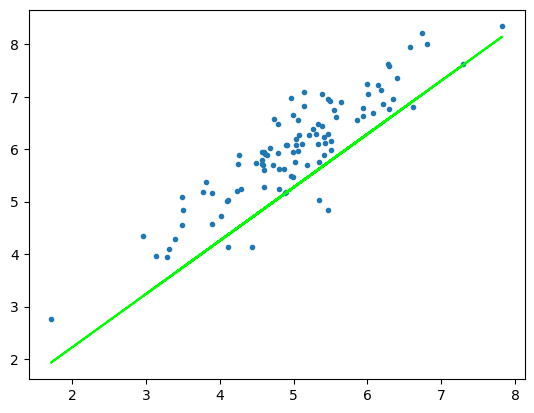

In [ ]:
trainNum = 2 # Number of training loops

for i in range(trainNum):
  count = 0
  for xj in X_train:

    if count % (X_train.shape[0]/5) == 0:
      Y_pred = np.matmul(X_test, theta.T) # Our prediction of the output y given inputs x and parameters theta
      err = calculateAbsMeanPercentageError(theta, X_test, Y_test, X_test.shape[0], True)  # the mean absolute error in our prediction and print the error percentage
      print(f"the absolute mean percentage error after the training pair {count} at epoch {i+1} is % {float(err) * 100}") # Print the error percentage
      myPlotFunc(X_test, Y_test, X_test.shape[0], '.', Y_pred, "lime", True, True, 2.0)  # plot the input output pairs in a scatter and draw our predictions of the outputs given the same inputs
    theta = StochasticGradientDescent(theta, X_train, Y_train, alpha, count) # Update the parameters theta by using stochastic gradient descent
    count += 1

# End results
Y_pred = np.matmul(X_test, theta.T) # Our prediction of the output y given inputs x and parameters theta
err = calculateAbsMeanPercentageError(theta, X_test, Y_test, X_test.shape[0], True)  # the mean absolute error in our prediction and print the error percentage
print(f"the absolute mean percentage error after training pair {count} epoch {i+1} is % {float(err) * 100}") # Print the error percentage
myPlotFunc(X_test, Y_test, X_test.shape[0], '.', Y_pred, "lime", True, True, 2.0)  # plot the input output pairs in a scatter and draw our predictions of the outputs given the same inputs



In [ ]:
theta.shape

(1, 2)